#  Credit Card Transactions Fraud Detection 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


**Importing Libraries Required**

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


# load data

train_data=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [10]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
train_data = train_data.drop(columns = 'Unnamed: 0')
test_data = test_data.drop(columns = 'Unnamed: 0')

In [14]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
enc = LabelEncoder()
train_data['merchant'] = enc.fit_transform(train_data['merchant'])
train_data['category'] = enc.fit_transform(train_data['category'])
train_data['street'] = enc.fit_transform(train_data['street'])
train_data['job'] = enc.fit_transform(train_data['job'])
train_data['trans_num'] = enc.fit_transform(train_data['trans_num'])
train_data['first'] = enc.fit_transform(train_data['first'])
train_data['city'] = enc.fit_transform(train_data['city'])
train_data['state'] = enc.fit_transform(train_data['state'])
train_data['last'] = enc.fit_transform(train_data['last'])
train_data['gender'] = enc.fit_transform(train_data['gender'])
train_data['trans_date_trans_time'] = enc.fit_transform(train_data['trans_date_trans_time'])
train_data['dob'] = enc.fit_transform(train_data['dob'])


In [16]:
test_data['merchant'] = enc.fit_transform(test_data['merchant'])
test_data['category'] = enc.fit_transform(test_data['category'])
test_data['street'] = enc.fit_transform(test_data['street'])
test_data['job'] = enc.fit_transform(test_data['job'])
test_data['trans_num'] = enc.fit_transform(test_data['trans_num'])
test_data['first'] = enc.fit_transform(test_data['first'])
test_data['city'] = enc.fit_transform(test_data['city'])
test_data['state'] = enc.fit_transform(test_data['state'])
test_data['last'] = enc.fit_transform(test_data['last'])
test_data['gender'] = enc.fit_transform(test_data['gender'])
test_data['trans_date_trans_time'] = enc.fit_transform(test_data['trans_date_trans_time'])
test_data['dob'] = enc.fit_transform(test_data['dob'])


In [17]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,...,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,309,157,0,435,612,...,48.8878,-118.2105,149,428,607,159395,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,115,381,1,602,468,...,42.1808,-112.2620,4154,307,302,818703,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,163,463,1,930,84,...,46.2306,-112.1138,1939,328,397,544575,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,336,149,1,418,216,...,38.4207,-79.4629,99,116,734,831111,1325376186,38.674999,-78.632459,0


In [18]:
train_data.shape,test_data.shape

((1296675, 22), (555719, 22))

In [19]:
x_train = train_data.drop(columns='is_fraud')
y_train = train_data['is_fraud']
x_test = test_data.drop(columns='is_fraud')
y_test = test_data['is_fraud']

In [20]:
x_train.shape,y_train.shape

((1296675, 21), (1296675,))

In [30]:
# we are using 2 models here for checking which one fits the data well
m1 = RandomForestClassifier()
m2 = DecisionTreeClassifier()

In [31]:
m1.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
m2.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
predectionsof_M1 = m1.predict(x_test)
predictionsof_M2 = m2.predict(x_test)

In [40]:
cmM1 = confusion_matrix(y_test,predectionsof_M1)
cmM2 = confusion_matrix(y_test,predictionsof_M2)

<Axes: >

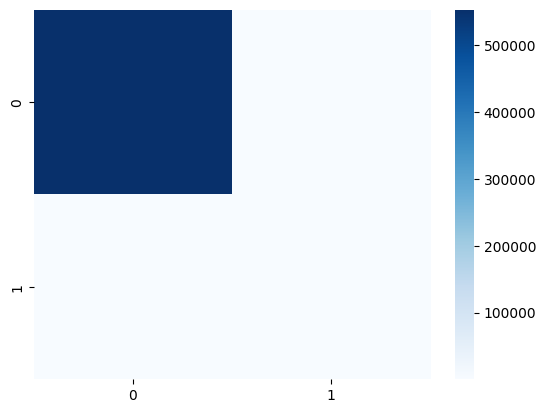

In [41]:
sns.heatmap(data=cmM1,cmap='Blues')

<Axes: >

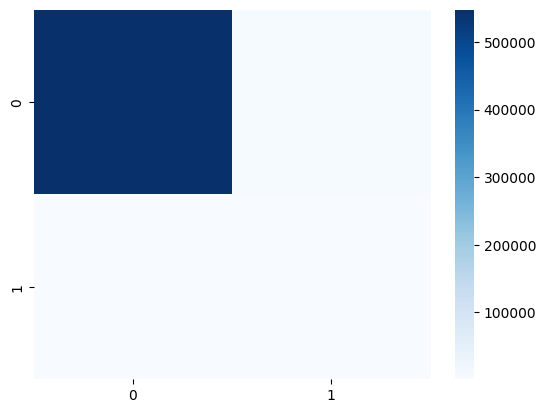

In [42]:
sns.heatmap(data=cmM2,cmap='Blues')


In [44]:
wrong_indices = np.where(predectionsof_M1 != y_test)[0]
wrong_indices.shape

(1461,)

In [49]:
wrong_indices[25]

11789

In [50]:
y_test[11789]

1

In [52]:
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [54]:
sumofM1= np.sum(predectionsof_M1)
sumofM1

1018

We can confirm that our code is not giving zero as output always

In [57]:
accuracyofM1= accuracy_score(y_test,predectionsof_M1)
accuracyofM2= accuracy_score(y_test,predictionsof_M2)
print("Accuracy of Random Forest:",accuracyofM1*100)
print("Accuracy of Random Forest:",accuracyofM2*100)

Accuracy of Random Forest: 99.73709734596082
Accuracy of Random Forest: 98.83106390100032


The Accuracy of our models are pretty good

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, predectionsof_M1, average='binary')


0.5380967435978502